В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [28]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [29]:
X = non_smoker_df[["age"]].values.reshape(-1, 1)
X_intercept = np.insert(X, 0, 1, axis=1)

y = non_smoker_df["charges"].values.reshape(-1, 1)

MNK = normal_equations(X_intercept, y)
predictions_MNK = np.dot(X_intercept, MNK)

rmse_MNK = np.sqrt(np.mean((y - predictions_MNK) ** 2))
MNK,predictions_MNK, rmse_MNK

(array([[-2091.42055657],
        [  267.24891283]]),
 array([[2719.0598744 ],
        [5391.54900271],
        [6727.79356686],
        ...,
        [2719.0598744 ],
        [2719.0598744 ],
        [3520.80661289]]),
 np.float64(4662.505766636395))

In [30]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors


In [31]:
m, b, errors = full_batch_gradient_descent(non_smoker_df[["age"]].values, non_smoker_df["charges"].values, lr=0.0001, epochs=1000)
m, b


(np.float64(221.1045843794301), np.float64(-41.98126853149978))

C:\Users\Dasha\AppData\Local\Temp\ipykernel_34680\2398359397.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


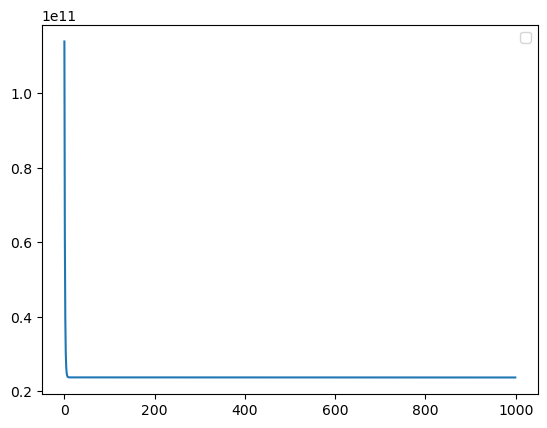

In [32]:
plt.plot(errors )
plt.legend()
plt.show()


In [33]:
m, b, errors = full_batch_gradient_descent(non_smoker_df[["age"]].values, non_smoker_df["charges"].values, lr=0.00001, epochs=1000)
m, b


(np.float64(220.15455551129122), np.float64(0.2130065279986326))

C:\Users\Dasha\AppData\Local\Temp\ipykernel_34680\2433547793.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


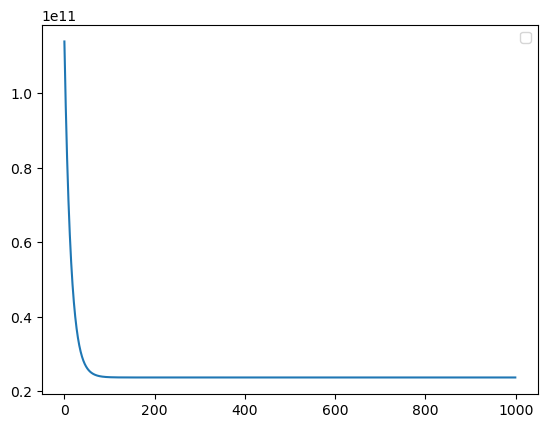

In [34]:

plt.plot(errors )
plt.legend()
plt.show()

In [35]:
m, b, errors = full_batch_gradient_descent(non_smoker_df[["age"]].values, non_smoker_df["charges"].values, lr=0.000001, epochs=1000)
predictions_fbgd = m * X[:, 0] + b
rmse_fbgd = np.sqrt(np.mean((non_smoker_df["charges"].values - predictions_fbgd) ** 2))
m, b,rmse_fbgd


(np.float64(213.4575690658104),
 np.float64(4.331249162394349),
 np.float64(4723.647721473958))

C:\Users\Dasha\AppData\Local\Temp\ipykernel_34680\2433547793.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


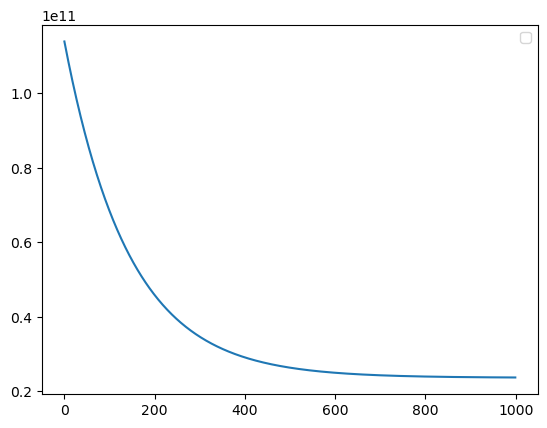

In [36]:

plt.plot(errors )
plt.legend()
plt.show()

In [37]:
%pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [39]:
lin_reg.fit(non_smoker_df[["age"]], non_smoker_df["charges"])
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650827))

In [40]:
predictions_sklearn = lin_reg.predict(non_smoker_df[["age"]])
rmse_sklearn = np.sqrt(np.mean((non_smoker_df["charges"].values - predictions_sklearn) ** 2))
predictions_sklearn, rmse_sklearn

(array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
        2719.0598744 , 3520.80661289]),
 np.float64(4662.505766636395))

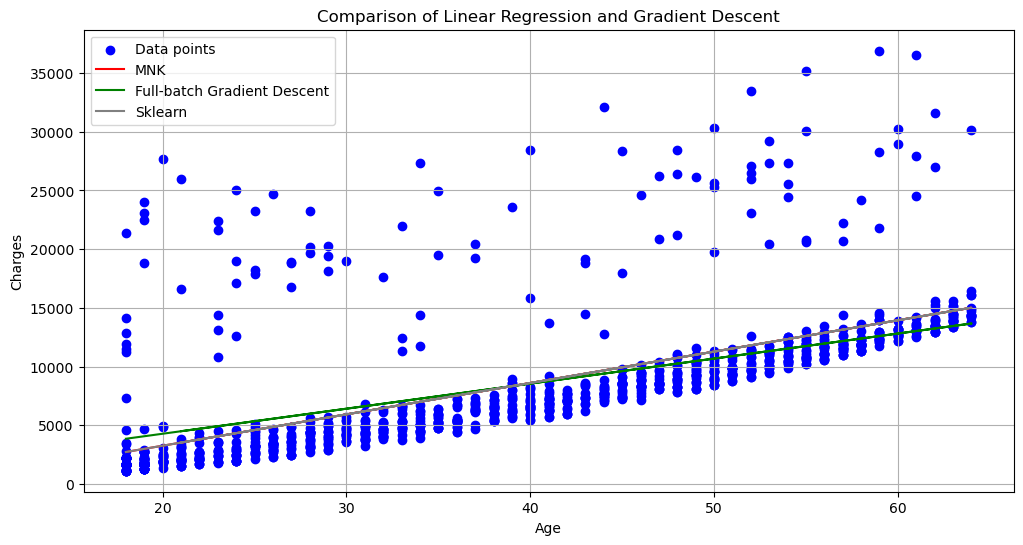

In [41]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Методи МНК та Градієнтний спуск від Sklearn дали меншу середню квадратичну помилку ніж Full-batch Gradient Descent. Коефіцієнти близькі до тих, що ми підбирали вручну раніше.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [42]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X = smoker_df[["age"]].values.reshape(-1, 1)
y = smoker_df["charges"].values.reshape(-1, 1)


In [43]:
lin_reg.fit(smoker_df[["age"]], smoker_df["charges"])
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), np.float64(20294.128126915966))

In [44]:
predictions_sklearn = lin_reg.predict(smoker_df[["age"]])
rmse_sklearn = np.sqrt(np.mean((smoker_df["charges"].values - predictions_sklearn) ** 2))
rmse_sklearn

np.float64(10711.00334810241)

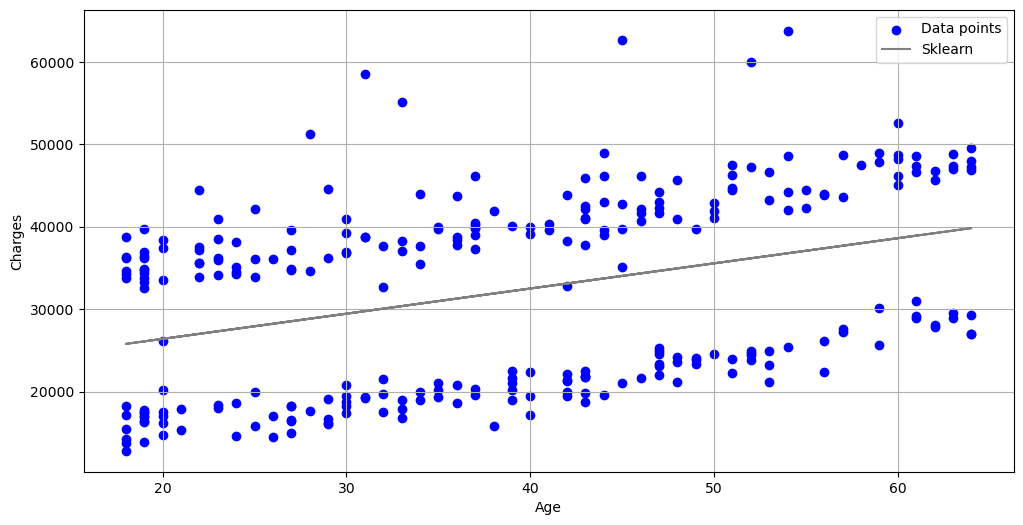

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Я б не використовувала цю модель у компанії, точність дуже мала, на грфіку видно що курці діляться ще на якісь дві групи, може було б доцільно дослідити чому є такий поідл і зробити дві різні моделі для цих грпу. 